In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Bring in the data
log2df = pd.read_csv('log2.csv')
log2df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


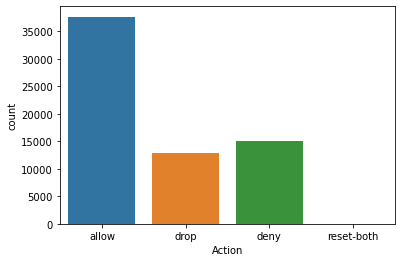

In [5]:
# looking for uneven variables  reset - both is  not really there
ax = sns.countplot(x='Action', data=log2df) 
plt.show()

In [8]:
# drop reset-both
log2df = log2df[log2df['Action'].str.contains("reset-both") == False]

In [10]:
# switch Action to be numerical 
#log2_df['Action'] = pd.Categorical(log2_df.Action).codes #  pd.Categorical(log2_df.Action).codes  # try pd.factorize(log2_df['Action'])

y = pd.factorize(log2df['Action'])
log2df['Action'] = y[0]
print(log2df.dtypes)

Source Port             int64
Destination Port        int64
NAT Source Port         int64
NAT Destination Port    int64
Action                  int64
Bytes                   int64
Bytes Sent              int64
Bytes Received          int64
Packets                 int64
Elapsed Time (sec)      int64
pkts_sent               int64
pkts_received           int64
dtype: object


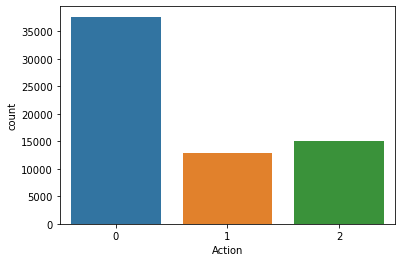

In [13]:
#here we can see that the action has been changed
ax = sns.countplot(x='Action', data=log2df) 
plt.show()

In [20]:
column = log2df["Bytes"]
max_value = column.max()
print(max_value)

1269359015


In [23]:
log2df[["Bytes", "Bytes Sent","Bytes Received","Packets","Elapsed Time (sec)","pkts_sent","pkts_received"]].describe()
#here we can see the average of the Elapsed time and packets sent and recieved could give us an idea

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,6.547800e+04,6.547800e+04,6.547800e+04,6.547800e+04,65478.000000,65478.000000,65478.000000
mean,9.720392e+04,2.240414e+04,7.479978e+04,1.029495e+02,65.887764,41.432481,61.517013
std,5.620755e+06,3.829717e+06,2.464222e+06,5.135118e+03,302.580571,3220.198139,2224.248197
min,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,7.530000e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000
